<a href="https://colab.research.google.com/github/MohammedBaz/AirClaim/blob/main/TemRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.1619
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0170
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0132
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0102
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0077
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0073
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0060
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0053
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0050
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0048
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


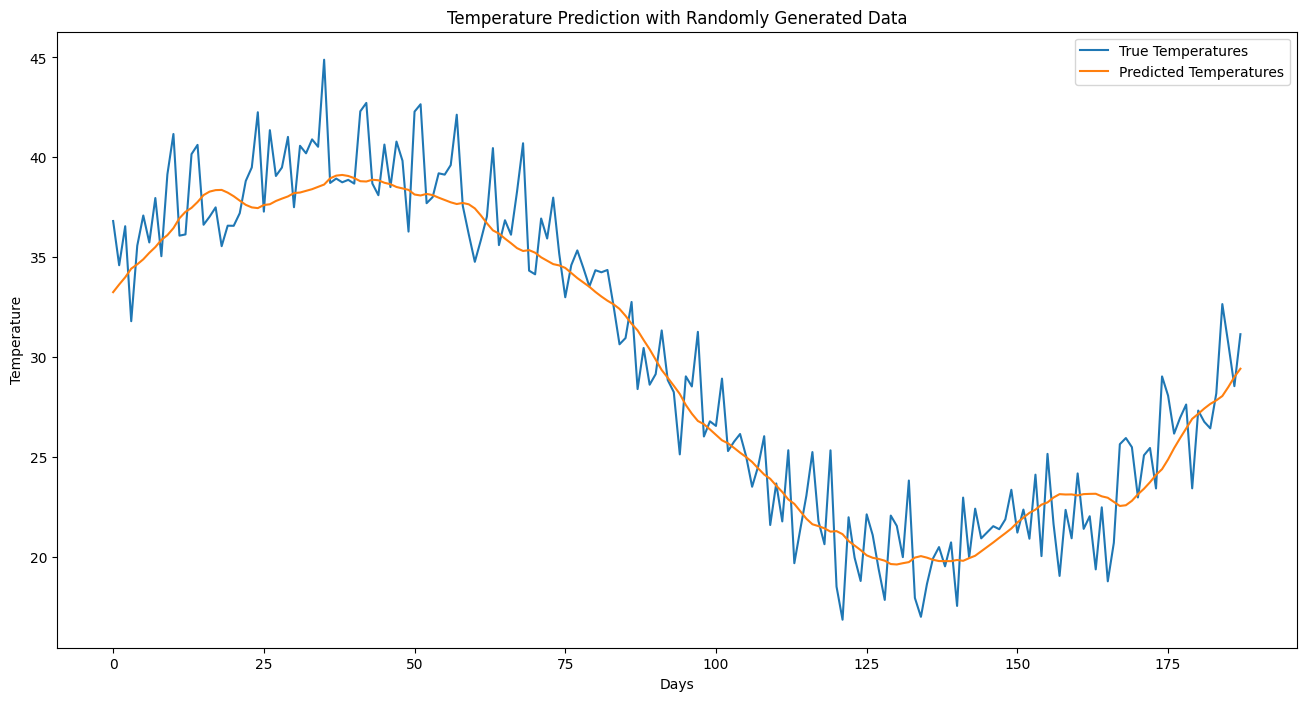

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Generate random temperature data
np.random.seed(42)  # For reproducibility
n_days = 1000  # Number of days
temperature_data = 30 + 10 * np.sin(np.linspace(0, 10 * np.pi, n_days)) + np.random.normal(0, 2, n_days)

# Convert it into a DataFrame to mimic a real dataset
data = pd.DataFrame(temperature_data, columns=['Temperature'])

# Normalize the data (LSTMs are sensitive to scale)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Temperature']])

# Create sequences of 60 days for training
def create_sequences(data, sequence_length=60):
    x = []
    y = []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# Reshape the input for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)

# Predicting on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test), label='True Temperatures')
plt.plot(range(len(predictions)), predictions, label='Predicted Temperatures')
plt.title('Temperature Prediction with Randomly Generated Data')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()
